In [2]:
import pandas as pd 
import numpy as np 

import re

import matplotlib.pyplot as plt
import seaborn as sns 




In [132]:
#Importing data 
df= pd.read_csv("C:/Users/ADMIN\Documents/My projects/Creator-Brand-Recommender/combined_instagram_data.csv")

print(df.columns)

#Shape of the data
print (f'Number of entries: {df.shape[0]}')
print (f'Number of columns: {df.shape[1]}')




Index(['account', 'fbid', 'id', 'followers', 'posts_count',
       'is_business_account', 'is_professional_account', 'is_verified',
       'avg_engagement', 'external_url', 'biography', 'business_category_name',
       'category_name', 'post_hashtags', 'following', 'posts',
       'profile_image_link', 'profile_url', 'profile_name', 'highlights_count',
       'highlights', 'full_name', 'is_private', 'bio_hashtags',
       'business_email', 'phone_number', 'url', 'is_joined_recently',
       'has_channel', 'partner_id', 'business_address', 'timestamp', 'input',
       'error', 'error_code', 'warning', 'warning_code', 'source_file',
       'processed_at'],
      dtype='object')
Number of entries: 2532
Number of columns: 39


In [129]:
df.duplicated().sum()

0

In [130]:
#checking for missing  values
df.isnull().sum()

account                       1
fbid                          1
id                            1
followers                     1
posts_count                   1
is_business_account           1
is_professional_account       1
is_verified                   1
avg_engagement              180
external_url                758
biography                   196
business_category_name     2455
category_name               563
post_hashtags              2532
following                     1
posts                       176
profile_image_link            1
profile_url                   1
profile_name                 46
highlights_count              1
highlights                 2532
full_name                    46
is_private                    1
bio_hashtags               2276
business_email             2532
phone_number               2532
url                           1
is_joined_recently            1
has_channel                   1
partner_id                    1
business_address           2421
timestam

## Data preprocessing 

In [ ]:


# Preprocess the biography text: lowercasing, removing punctuation, and tokenizing
def clean_and_tokenize(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize the text into words
    return words

# Apply the function to the biography column
all_words = df['biography'].fillna('').apply(clean_and_tokenize)

#Make a siingle list and get unique words
unique_keywords = set([word for sublist in all_words for word in sublist])

# Display the unique keywords
print(unique_keywords)


{'standup', '214k', 'animator', 'sparkscorporates', 'creation', '𝒜𝑔𝑒𝓃𝓉', 'javaphile', 'msa', 'selectmodelstockholm', 'experience', 'lit', 'الجبيله', 'jauloma', 'kie_kie_tv_', '𝚌𝚘𝚗𝚌𝚎𝚙𝚝', 'de', 'media', 'meaningful', 'uselemfi', 'awardee', 'christ', 'academies', 'bornliving', 'kitakaswangzavenuecom', 'seated', 'destined', 'ability', 'peluminubinetworkcom', 'mukbangs', 'الدنيا', 'highquality', 'subscribers', 'תבדקו', '9th', 'unlearning', 'إني', 'museum', 'coaching', 'presentertheweddingshow', 'swag', 'mama', 'text', 'well', 'yardenetinsrecordscom', 'shirkomedia_ent', 'fine', 'fromoutersouth', 'britaniafoods', 'c', 'billboardcharts', 'pearl', 'desserts', 'ambivert', 'bookingkarungmailcom', 'hannahjaynegrailtalentcom', 'nurturing', '𝐴𝑙', '5676127', 'programmes', 'pallonji', 'woodways', 'touchbybetty', 'aroap', 'naivas', 'ditalia', 'vessel', 'jimseuhh', 'zerowaste', 'child', 'founderartistic', 'hausofafro', 'vocalist', 'rapper', 'yankees', 'changed', '780', 'jimseuhgiseleparisfr', 'making', 

Dataset with niches saved successfully at: C:/Users/ADMIN/Documents/My projects/Creator-Brand-Recommender/combined_instagram_data_with_niches.csv
(2532, 41)
(2532, 24)
(2532, 14)


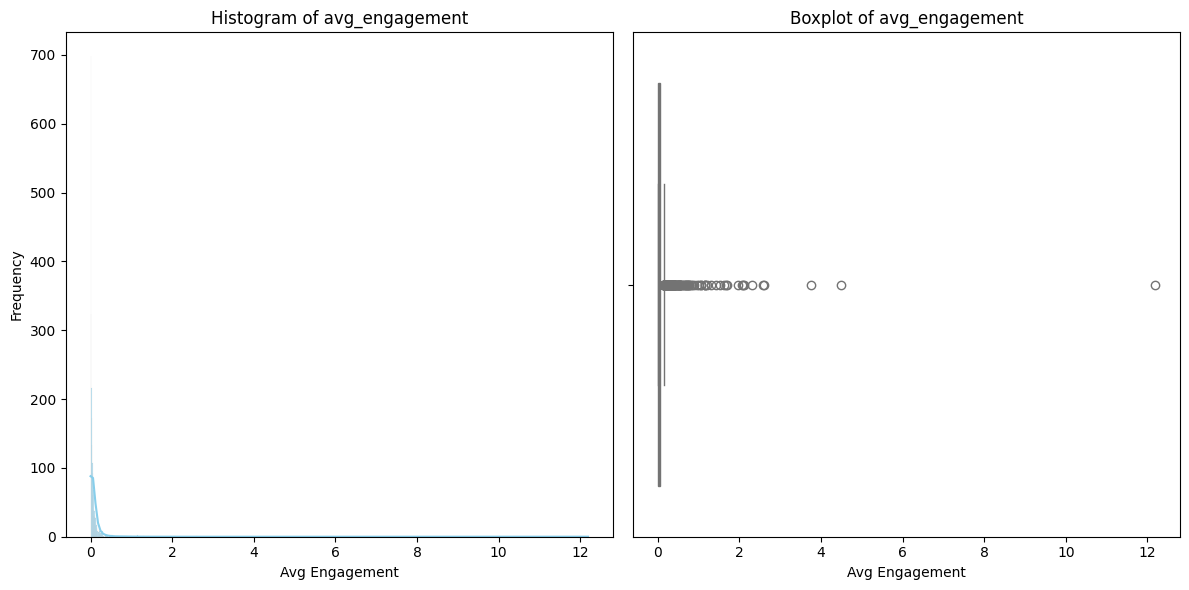

     account  followers  posts_count  is_business_account  \
2498     NaN        NaN          NaN                  NaN   

      is_professional_account  is_verified  avg_engagement biography  \
2498                      NaN          NaN         0.02325       NaN   

     category_name  following profile_image_link  highlights_count  \
2498           NaN        NaN                NaN               NaN   

     biography_clean  niche  
2498                  Other  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19776\1483080613.py:84: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_engagement'].fillna(median_val, inplace=True)


(2531, 12)

In [133]:
# Define keyword dictionaries for niches
niche_keywords = {
    'Health': ['health','fitness', 'workout', 'gym', 'health', 'trainer', 'yoga','fit','dermatologist','swimmer','pharmacy','hospital','clinic','surgery','wellness'],
    'Lifestyle':['lifestyle','mum','dad','mother','father','mama','marriage', 'married','therapy','spa','pet','model','wife','parent'],
    'Fashion': ['fashion', 'style', 'designer', 'clothing', 'beauty', 'makeup','clothes','dressing','wear','lotion','perfume','skin care','stylist'],
    'Travel': ['travel', 'wanderlust', 'vacation', 'adventure', 'explore','safari'],
    'Tech': ['tech', 'gadgets', 'software', 'developer', 'AI', 'programmer','machine','data'],
    'Food': ['food', 'recipe', 'chef', 'cooking', 'baking', 'restaurant','hotel','kitchen','foodie'],
    'Art': ['art', 'artist', 'drawing', 'painting', 'illustration', 'design','comedy','podcast','craft','photograph','choreography','actor','actress','writer','host','poet','storyteller','author'],
    'Music': ['music', 'singer', 'band', 'producer', 'songwriter', 'DJ','rapper','vocalist','saxophonist','musician'],
    'Business':['business','finance','financial','money','consultancy','shop','consulting','entrepreneur','store'],
}

# Preprocess the biography text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['biography_clean'] = df['biography'].fillna('').apply(clean_text)

# Match keywords to assign all matching niches
def assign_niches(bio, keywords_dict):
    niches = [niche for niche, keywords in keywords_dict.items() if any(keyword in bio for keyword in keywords)]
    return ' '.join(niches) if niches else 'Other'  # Join multiple niches with a space, or return 'Other'

# Apply the function to the clean biography column
df['niche'] = df['biography_clean'].apply(lambda x: assign_niches(x, niche_keywords))

# Save the updated dataset 
save_path = "C:/Users/ADMIN/Documents/My projects/Creator-Brand-Recommender/combined_instagram_data_with_niches.csv"
df.to_csv(save_path, index=False)

print(f"Dataset with niches saved successfully at: {save_path}")

print(df.shape)


# List of columns to drop
columns_to_drop = [
    'profile_name', 'full_name', 'fbid', 'id', 'external_url', 'business_category_name', 'posts',
    'profile_url', 'is_private', 'url', 'is_joined_recently', 'has_channel',
    'partner_id', 'timestamp', 'input', 'source_file', 'processed_at'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

print(df.shape)

#Remove columns with more than 50% missing data 
# Calculate the threshold for 50% missing data
threshold = len(df) * 0.5

# Remove columns with more than 50% missing data
df = df.dropna(axis=1, thresh=threshold)


print(df.shape)


# filling avg_engagement column 
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram 
sns.histplot(df['avg_engagement'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Histogram of avg_engagement')
axes[0].set_xlabel('Avg Engagement')
axes[0].set_ylabel('Frequency')

# Boxplot 
sns.boxplot(x=df['avg_engagement'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of avg_engagement')
axes[1].set_xlabel('Avg Engagement')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#Since the data is highly skewed,  impute missing values with the median

median_val = df['avg_engagement'].median()
df['avg_engagement'].fillna(median_val, inplace=True)

null_followers = df[df['followers'].isnull()]
print(null_followers)

#Most of it's entries in other columns are empty hence we delete it 
df= df.dropna(subset=['followers'])

#Drop category name since it was replaced by niche
df = df.drop(columns=['category_name'])

# Drop the 'biography' column since it's now represented by 'niche'
df= df.drop(columns=['biography'])

df.shape



In [134]:
#checking for missing  values
df.isnull().sum()

account                    0
followers                  0
posts_count                0
is_business_account        0
is_professional_account    0
is_verified                0
avg_engagement             0
following                  0
profile_image_link         0
highlights_count           0
biography_clean            0
niche                      0
dtype: int64

In [135]:
df.shape

(2531, 12)